1. Determine the number of deaths by country on the first and last dates and create a plot illustrating the distribution of deaths across countries.

2. Utilize Facebook Prophet for time series forecasting to predict the next 14 days' confirmed cases, active cases, and recoveries.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/covid_19_clean_complete (14).csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df['Province/State'].isna().sum()

34404

In [ ]:
df.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
df.drop(columns = ['Province/State'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  49068 non-null  object 
 1   Lat             49068 non-null  float64
 2   Long            49068 non-null  float64
 3   Date            49068 non-null  object 
 4   Confirmed       49068 non-null  int64  
 5   Deaths          49068 non-null  int64  
 6   Recovered       49068 non-null  int64  
 7   Active          49068 non-null  int64  
 8   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


In [ ]:
df.rename(columns = {'Country/Region': 'country'}, inplace = True)

In [ ]:
df.columns

Index(['country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'WHO Region'],
      dtype='object')

In [ ]:
df['Date'].unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

Determine the number of deaths by country on the first and last dates and create a plot illustrating the distribution of deaths across countries.

In [ ]:
first_date = df[df['Date'] == df['Date'].min()]
first_date

,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
256,Sao Tome and Principe,0.186400,6.613100,2020-01-22,0,0,0,0,Africa
257,Yemen,15.552727,48.516388,2020-01-22,0,0,0,0,Eastern Mediterranean
258,Comoros,-11.645500,43.333300,2020-01-22,0,0,0,0,Africa
259,Tajikistan,38.861000,71.276100,2020-01-22,0,0,0,0,Europe


In [ ]:
last_date = df[df['Date'] == df['Date'].max()]
last_date

,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
#first date
first_date_country = first_date.groupby('country')[['Confirmed','Deaths',	'Recovered',	'Active']].sum().reset_index()
first_date_country

,country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,0,0,0,0
1,Albania,0,0,0,0
2,Algeria,0,0,0,0
3,Andorra,0,0,0,0
4,Angola,0,0,0,0
...,...,...,...,...,...
182,West Bank and Gaza,0,0,0,0
183,Western Sahara,0,0,0,0
184,Yemen,0,0,0,0
185,Zambia,0,0,0,0


In [ ]:
import plotly.express as px

In [ ]:
fig = px.choropleth(first_date_country, locations = 'country', locationmode = 'country names',
                    color = 'Deaths',hover_name = 'country', range_color = [1,20],
                    color_continuous_scale='greens')
fig.show()

In [ ]:
#last date
last_date_country = last_date.groupby('country')[['Confirmed','Deaths',	'Recovered',	'Active']].sum().reset_index()
last_date_country

,country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [ ]:
fig = px.choropleth(last_date_country, locations = 'country', locationmode = 'country names',
                    color = 'Deaths',hover_name = 'country', range_color = [1,50000],
                    color_continuous_scale='Blues')
fig.show()

Utilize Facebook Prophet for time series forecasting to predict the next 14 days' confirmed cases, active cases, and recoveries.

In [ ]:
#fb prophet
# it is an open source tool for forecasting the time series data.
# it is used to perform the model on the basis of combining the tends, seasonality and noise
# here you don't have to make the data stationary and their is no need to find out the d, p, q and s values


In [ ]:
df['Date']

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
49063    2020-07-27
49064    2020-07-27
49065    2020-07-27
49066    2020-07-27
49067    2020-07-27
Name: Date, Length: 49068, dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date']

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
49063   2020-07-27
49064   2020-07-27
49065   2020-07-27
49066   2020-07-27
49067   2020-07-27
Name: Date, Length: 49068, dtype: datetime64[ns]

In [ ]:
df.head(2)

,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe


In [ ]:
total_confirm_case = df.groupby('Date')['Confirmed'].sum().reset_index()
total_confirm_case

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
total_recovery_case = df.groupby('Date')['Recovered'].sum().reset_index()
total_active_case = df.groupby('Date')['Active'].sum().reset_index()
print(total_recovery_case)
print(total_active_case)

          Date  Recovered
0   2020-01-22         28
1   2020-01-23         30
2   2020-01-24         36
3   2020-01-25         39
4   2020-01-26         52
..         ...        ...
183 2020-07-23    8710969
184 2020-07-24    8939705
185 2020-07-25    9158743
186 2020-07-26    9293464
187 2020-07-27    9468087

[188 rows x 2 columns]
          Date   Active
0   2020-01-22      510
1   2020-01-23      606
2   2020-01-24      879
3   2020-01-25     1353
4   2020-01-26     2010
..         ...      ...
183 2020-07-23  6166006
184 2020-07-24  6212290
185 2020-07-25  6243930
186 2020-07-26  6309711
187 2020-07-27  6358362

[188 rows x 2 columns]


In [ ]:
# if module not found the install the lib first
# pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
# pip install prophet

In [ ]:
# 'ds' and 'y'
#ds --> date time column
# y --> data col
# always you have to rename your col with these two names i.e., 'ds' and 'y'
total_confirm_case.columns = ['ds','y']
total_confirm_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [ ]:
total_confirm_case

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
#Model creation
model = Prophet(interval_width = 0.95)  # three values we can use here i.e., 0.8, 0.9 or 0.95
# interval_width is confidence interval

In [ ]:
model.fit(total_confirm_case)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6yb_couo/3dxtqiwx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6yb_couo/k4en59wy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7257', 'data', 'file=/tmp/tmp6yb_couo/3dxtqiwx.json', 'init=/tmp/tmp6yb_couo/k4en59wy.json', 'output', 'file=/tmp/tmp6yb_couo/prophet_model5s3zs6vi/prophet_model-20240505065817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:58:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:58:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods = 14, freq='D')
# periods --> assign number for future
# 'D' --> Day :: 'M' --> Month :: 'Y' --> Year
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
197,2020-08-06
198,2020-08-07
199,2020-08-08
200,2020-08-09


In [ ]:
future_1 = model.predict(future)
future_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.916508e+05,1.395845e+05,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.609336e+05,1.513971e+05,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.511250e+05,1.702899e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-1.491484e+05,1.751137e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-1.721091e+05,1.701864e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2020-08-06,1.817296e+07,1.795694e+07,1.838268e+07,1.801068e+07,1.834346e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.817184e+07
198,2020-08-07,1.837695e+07,1.817196e+07,1.862742e+07,1.818527e+07,1.857258e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.838703e+07
199,2020-08-08,1.858094e+07,1.836293e+07,1.884868e+07,1.836894e+07,1.879484e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.859469e+07
200,2020-08-09,1.878493e+07,1.852380e+07,1.905888e+07,1.854694e+07,1.902244e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.879223e+07


In [ ]:
future_1.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
'yhat' --> forecasting values for each time points.
'yhat_lower' --> lower bound of the interval_width (confidence interval)
'yhat_upper' --> upper bound of the interval_width

In [ ]:
future_1[['yhat','yhat_lower','yhat_upper']] = future_1[['yhat','yhat_lower','yhat_upper']].astype(int)

In [ ]:
future_1[['yhat','yhat_lower','yhat_upper']]

,yhat,yhat_lower,yhat_upper
0,-20676,-191650,139584
1,-8050,-160933,151397
2,5827,-151125,170289
3,12176,-149148,175113
4,8405,-172109,170186
...,...,...,...
197,18171841,17956943,18382676
198,18387030,18171961,18627419
199,18594690,18362927,18848676
200,18792229,18523798,19058881


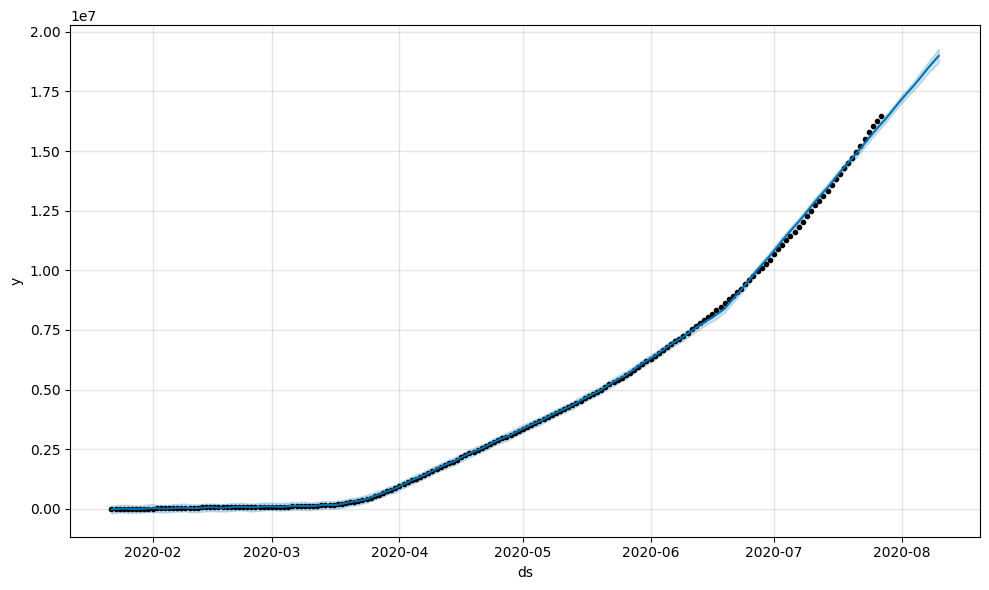

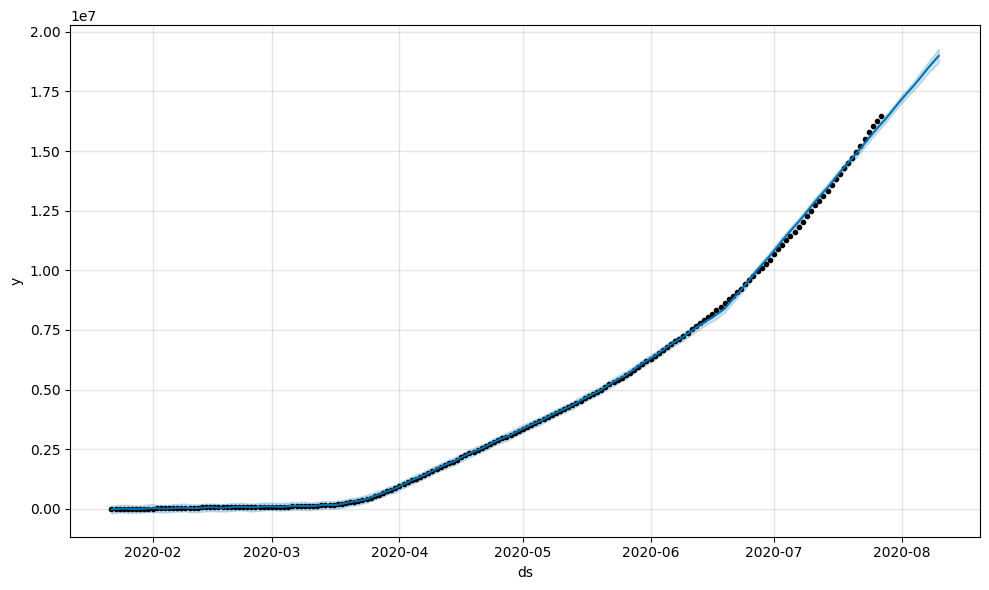

In [ ]:
# confirmed_plot = model.plot(future_1)
model.plot(future_1)